In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
plt.style.use("seaborn-darkgrid")

In [2]:
## Small script to change rgb image to gray-scale image
from skimage import color
from skimage import io

img = io.imread('D:/AI_thesis/workshop_paper/alphabet_photo/340.jpg')
imgGray = color.rgb2gray(img)

plt.imshow(imgGray,cmap='gray')
plt.grid(False)
plt.axis('off')
#plt.savefig('D:/AI_thesis/workshop_paper/alphabet_photo/csl_a.tif')

FileNotFoundError: No such file: 'D:\AI_thesis\workshop_paper\alphabet_photo\340.jpg'

In [ ]:
import pickle

with open('some-file.pkl', 'rb') as f:
    data = pickle.load(f)
# with open('test/test.pkl', 'rb') as f:
#     data = pickle.load(f)
    
print(data)

## Validation accuracy performance of active learning on ASL

In [2]:
#validation performance of ASL ACTIVE LEARNING
data_bald = np.load("ASL_val_result_npy/bald-MC_dropout=True.npy")
data_max_entropy = np.load("ASL_val_result_npy/max_entropy-MC_dropout=True.npy")
data_mean_std = np.load("ASL_val_result_npy/mean_std-MC_dropout=True.npy")
data_uniform = np.load("ASL_val_result_npy/uniform-MC_dropout=True.npy")
data_var_ratios = np.load("ASL_val_result_npy/var_ratios-MC_dropout=True.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std,"uniform": data_uniform, "var_ratios": data_var_ratios}

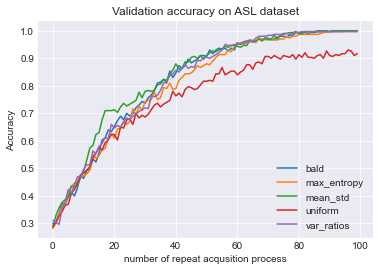

In [3]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key][:100], label=key)
plt.legend()
plt.title("Validation accuracy on ASL dataset")
plt.xlabel("number of repeat acqusition process")
plt.ylabel("Accuracy")
plt.show()

## Validation accuracy performance of bsl active learning

In [4]:
#validation performance of ACTIVE LEARNING on BSL dataset
data_bald = np.load("BSL_result_npy/bald-MC_dropout=True.npy")
data_max_entropy = np.load("BSL_result_npy/max_entropy-MC_dropout=True.npy")
#data_mean_std = np.load("result_npy_BSL/mean_std-MC_dropout=True.npy")
data_uniform = np.load("BSL_result_npy/uniform-MC_dropout=True.npy")
data_var_ratios = np.load("BSL_result_npy/var_ratios-MC_dropout=True.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        #"mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

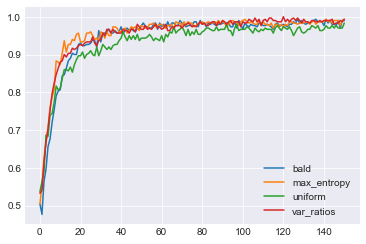

In [5]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key], label=key)
plt.legend()
plt.show()

## Sample new dataset with weight from ASL

Text(0.5, 0, 'alphabet')

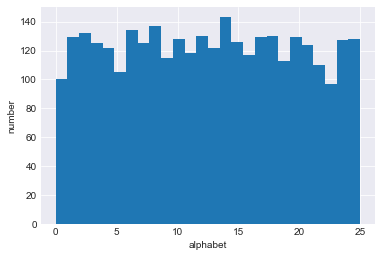

In [5]:
#have a look at the dataset
ds_train = pd.read_csv("D:/AI_thesis/Sign_dataset/sign_ISL_train.csv") 
ds_test = pd.read_csv("D:/AI_thesis/Sign_dataset/sign_ISL_test.csv") 
ds_train
ds_test["label"].hist(bins=26)
plt.ylabel("number")
plt.xlabel("alphabet")

In [8]:
freq= {"E":0.111,"A":0.085,"R":0.076,"I":0.075,"O":0.071,"T":0.070,"N":0.067,"S":0.057,"L":0.055,"C":0.045,"U":0.036,"D":0.034,"P":0.032,
    "M":0.030,"H":0.030,"G":0.025,"B":0.021,"F":0.018,"Y":0.018,"W":0.013,"K":0.011,"V":0.010,"X":0.003,"J":0.002,"Q":0.002, "Z":0.003}
Alphabet_list=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

from collections import defaultdict
new_freq = defaultdict(float)
for i in Alphabet_list:
    index = Alphabet_list.index(i)
    freq[str(index)] = freq[i]
    del freq[i]   
#del freq['9']

weight=[]
for index, row in ds_train.iterrows():
    weight.append(freq[str(row['label'])])
ser = pd.Series(data=weight)

In [9]:
weight_sampleed_train= ds_train.sample(frac=1, replace=True, weights=ser, random_state=1)
unweight_sampleed_train = ds_train.sample(frac=1, replace=True, weights=None, random_state=1)
unweight_sampleed_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
235,1,5,5,5,7,7,5,5,6,5,...,5,6,5,6,6,6,6,5,6,10
12172,23,1,1,2,2,3,2,2,2,3,...,5,5,5,5,5,5,5,5,5,10
5192,4,17,19,19,20,20,18,18,18,19,...,18,18,18,19,19,20,20,20,20,24
17289,0,14,13,15,16,17,18,16,16,18,...,11,12,12,13,13,13,13,12,11,21
10955,6,16,17,15,15,17,16,16,16,14,...,14,14,14,14,15,15,15,15,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19179,14,109,121,130,135,140,144,148,149,151,...,93,137,136,136,135,134,133,132,128,118
16165,20,10,12,12,14,18,17,15,17,15,...,14,14,15,14,14,15,14,14,16,21
15844,19,22,8,7,7,6,8,12,12,9,...,96,107,109,14,11,10,10,10,10,14
18537,19,5,9,7,7,6,9,13,12,9,...,107,98,14,13,15,14,14,14,14,17


In [11]:
#sampleed_train["label"].hist(bins=25, density=True)
#plt.ylabel("relative frequency")
#plt.xlabel("alphabets")
weight_sampleed_train.to_csv(path_or_buf="sign_dataset/sampled_sign_ISL_train.csv", index=False)
#sampleed_train = pd.read_csv("sign_dataset/sampled_sign_mnist_train.csv")

unweight_sampleed_train.to_csv(path_or_buf="sign_dataset/unwei_sampled_ISL.csv", index=False)
#sampleed_train = pd.read_csv("sign_dataset/sampled_sign_mnist_train.csv")

## validation performance of MNIST ACTIVE LEARNING

In [26]:
#validation performance of MNIST ACTIVE LEARNING
data_bald = np.load("result_npy/bald-MC_dropout=TrueMNIST.npy")
data_max_entropy = np.load("result_npy/max_entropy-MC_dropout=TrueMNIST.npy")
#data_mean_std = np.load("result_npy/mean_std-MC_dropout=TrueMNIST.npy")
data_uniform = np.load("result_npy/uniform-MC_dropout=TrueMNIST.npy")
data_var_ratios = np.load("result_npy/var_ratios-MC_dropout=TrueMNIST.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        #"mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

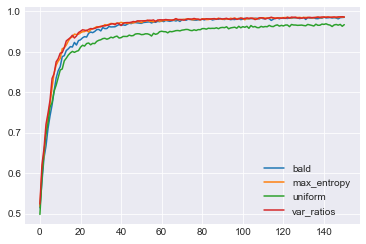

In [27]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key], label=key)
plt.legend()
plt.show()

In [54]:
#Test performance of ASL ACTIVE LEARNING
data_bald = np.load("result_npy/bald-MC_dropout=TrueASL_MNIST.npy")
data_max_entropy = np.load("result_npy/max_entropy-MC_dropout=TrueASL_MNIST.npy")
data_mean_std = np.load("result_npy/mean_std-MC_dropout=TrueASL_MNIST.npy")
data_uniform = np.load("result_npy/uniform-MC_dropout=TrueASL_MNIST.npy")
data_var_ratios = np.load("result_npy/var_ratios-MC_dropout=TrueASL_MNIST.npy")
data = {"bald": data_bald, "max_entropy": data_max_entropy, 
        "mean_std": data_mean_std,
        "uniform": data_uniform, "var_ratios": data_var_ratios}

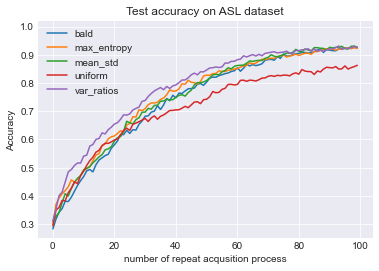

In [62]:
#data = {"bald": data_bald, "max_entropy": data_max_entropy, "mean_std": data_mean_std, "var_ratios": data_var_ratios}
for key in data.keys():
    plt.plot(data[key][:100], label=key)
plt.legend()
plt.title("Test accuracy on ASL dataset")
plt.xlabel("number of repeat acqusition process")
plt.ylabel("Accuracy")
plt.ylim([0.25,1.02])
plt.show()

## VISUALIZE the confusion matrix imbalanced 0.4*1

In [5]:
#Confusion matrix for 0.4 weighted 
con_bald = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_bald.csv", delimiter=',')
con_max_entropy = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_max_entropy.csv", delimiter=',')
con_mean_std = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_mean_std.csv", delimiter=',')
con_uniform = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_uniform.csv", delimiter=',')
con_var_ratios = np.genfromtxt("confusion_matrix/ASL_weighted_samlped_matrix/con_mat_var_ratios.csv", delimiter=',')

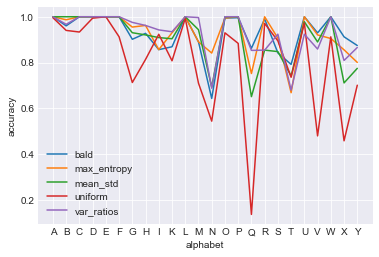

In [6]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =con_bald.diagonal()/con_bald.sum(axis=1)
accuracy_max_entropy =con_max_entropy.diagonal()/con_bald.sum(axis=1)
accuracy_mean_std =con_mean_std.diagonal()/con_bald.sum(axis=1)
accuracy_uniform =con_uniform.diagonal()/con_bald.sum(axis=1)
accuracy_var_ratios =con_var_ratios.diagonal()/con_bald.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## VISUALIZE the imbalanced confusion matrix 1

In [22]:
#Confusion matrix for 1 weighted 
full_con_bald = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_bald_.csv", delimiter=',')
full_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_max_max_entropy.csv", delimiter=',')
full_con_mean_std = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_mean_std.csv", delimiter=',')
full_con_uniform = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_uniform.csv", delimiter=',')
full_con_var_ratios = np.genfromtxt("confusion_matrix/ASL_full_weighted_samlped_matrix/ASL_MNIST_imbalcon_mat_var_ratios.csv", delimiter=',')

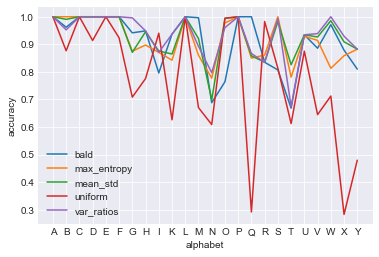

In [8]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =full_con_bald.diagonal()/full_con_bald.sum(axis=1)
accuracy_max_entropy =full_con_max_entropy.diagonal()/full_con_bald.sum(axis=1)
accuracy_mean_std =full_con_mean_std.diagonal()/full_con_bald.sum(axis=1)
accuracy_uniform =full_con_uniform.diagonal()/full_con_bald.sum(axis=1)
accuracy_var_ratios =full_con_var_ratios.diagonal()/full_con_bald.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## VISUALIZE the balanced confusion matrix 1

In [24]:
#Confusion matrix for 1 unweighted 
full_unwei_con_bald = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_bald.csv", delimiter=',')
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_max_entropy.csv", delimiter=',')
full_unwei_con_mean_std = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_mean_std.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_uniform.csv", delimiter=',')
full_unwei_con_var_ratios = np.genfromtxt("confusion_matrix/ASL_full_unweighted_sampled_matrix/unwei_ASL_MNISTcon_mat_var_ratios.csv", delimiter=',')

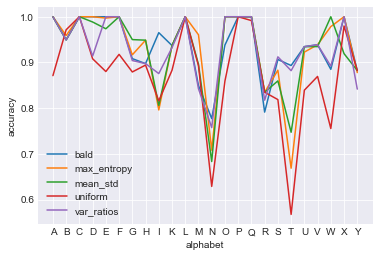

In [25]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
accuracy_bald =full_unwei_con_bald.diagonal()/full_unwei_con_bald.sum(axis=1)
accuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
accuracy_mean_std =full_unwei_con_mean_std.diagonal()/full_unwei_con_mean_std.sum(axis=1)
accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)
accuracy_var_ratios =full_unwei_con_var_ratios.diagonal()/full_unwei_con_var_ratios.sum(axis=1)

miss_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, ax = plt.subplots(1,1)
ax.plot([i for i in range(24)], accuracy_bald, label="bald")
ax.plot([i for i in range(24)], accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(24)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(24)], accuracy_uniform, label="uniform")
ax.plot([i for i in range(24)], accuracy_var_ratios, label="var_ratios")



plt.xticks([i for i in range(24)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( miss_Alphabet_list )
ax.legend()

## Visualize the weighted GSL result 

In [22]:
#Confusion matrix for 1 unweighted 
full_unwei_con_bald = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matbald.csv", delimiter=',')
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matmax_.csv", delimiter=',')
full_unwei_con_mean_std = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matmean.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matunif.csv", delimiter=',')
full_unwei_con_var_ratios = np.genfromtxt("confusion_matrix/GSL_full_weighted_sampled_matrix/GSL_MNIST_imbalcon_matvar_.csv", delimiter=',')

sum(full_unwei_con_max_entropy.diagonal())/sum(sum(full_unwei_con_max_entropy))

0.6110414052697616

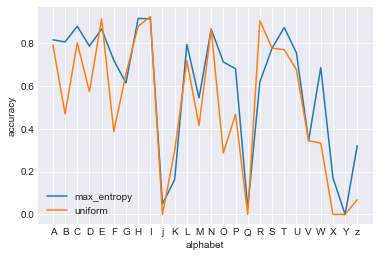

In [8]:
# plt.figure(figsize=(10,7))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(con_bald,annot=True, annot_kws={"size": 10})
#accuracy_bald =full_unwei_con_bald.diagonal()/full_unwei_con_bald.sum(axis=1)
GSL_laccuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
#accuracy_mean_std =full_unwei_con_mean_std.diagonal()/full_unwei_con_mean_std.sum(axis=1)
GSL_accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)
#accuracy_var_ratios =full_unwei_con_var_ratios.diagonal()/full_unwei_con_var_ratios.sum(axis=1)

all_Alphabet_list=["A","B","C","D","E","F","G","H","I","j","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","z"]

figure, ax = plt.subplots(1,1)
#ax.plot([i for i in range(26)], accuracy_bald, label="bald")
ax.plot([i for i in range(26)], GSL_laccuracy_max_entropy, label="max_entropy")
#ax.plot([i for i in range(26)], accuracy_mean_std, label="mean_std")
ax.plot([i for i in range(26)], GSL_accuracy_uniform, label="uniform")
#ax.plot([i for i in range(26)], accuracy_var_ratios, label="var_ratios")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend()

## Visualize the weighted ASL + GSL train together(same conv and classifier) result 

In [23]:
#Confusion matrix for 1 unweighted 
full_unwei_con_max_entropy = np.genfromtxt("confusion_matrix/ASL_GSL_weighted_sampled_matrix/ASL_GSL_MNIST_imbalcon_matmax_.csv", delimiter=',')
full_unwei_con_uniform = np.genfromtxt("confusion_matrix/ASL_GSL_weighted_sampled_matrix/ASL_GSL_MNIST_imbalcon_matunif.csv", delimiter=',')
sum(full_unwei_con_max_entropy.diagonal())/sum(sum(full_unwei_con_max_entropy))


0.699289000418235

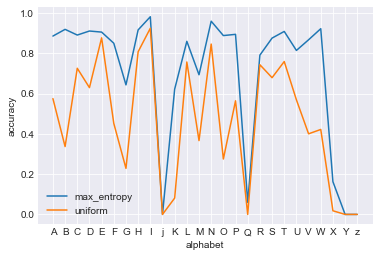

In [24]:
A_GSL_accuracy_max_entropy =full_unwei_con_max_entropy.diagonal()/full_unwei_con_max_entropy.sum(axis=1)
A_GSL_accuracy_uniform =full_unwei_con_uniform.diagonal()/full_unwei_con_uniform.sum(axis=1)

all_Alphabet_list=["A","B","C","D","E","F","G","H","I","j","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","z"]

figure, ax = plt.subplots(1,1)

ax.plot([i for i in range(26)], A_GSL_accuracy_max_entropy, label="max_entropy")
ax.plot([i for i in range(26)], A_GSL_accuracy_uniform, label="uniform")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend()

## Comparsion of ASL and GSL

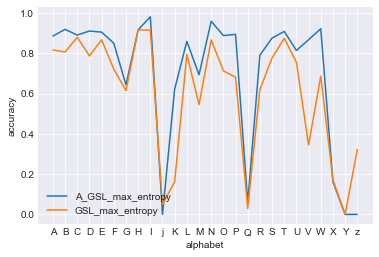

In [25]:
figure, ax = plt.subplots(1,1)

ax.plot([i for i in range(26)], A_GSL_accuracy_max_entropy, label="A_GSL_max_entropy")
#ax.plot([i for i in range(26)], A_GSL_accuracy_uniform, label="A_GSL_uniform")
ax.plot([i for i in range(26)], GSL_laccuracy_max_entropy, label="GSL_max_entropy")
#ax.plot([i for i in range(26)], GSL_accuracy_uniform, label="GSL_uniform")

plt.xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax.set_xticklabels( all_Alphabet_list )
ax.legend(loc=3)

### Compare Irish and Irish+GSL_pretrain 

In [50]:
#Confusion matrix for 1 unweighted 
Irish_scratch_var = np.genfromtxt("con_mat/con_mat_Irish_SL_MNIST_imbal_novar_.csv", delimiter=',')
Irish_GSL_pre_var = np.genfromtxt("con_mat/con_mat_Irish_SL_MNIST_imbal_yesvar_.csv", delimiter=',')
sum(Irish_scratch_var.diagonal())/sum(sum(Irish_scratch_var))
print("Accuracy for training from scratcch is :", sum(Irish_scratch_var.diagonal())/sum(sum(Irish_scratch_var)))
,
sum(Irish_GSL_pre_var.diagonal())/sum(sum(Irish_GSL_pre_var))
print("Accuracy for using pretrained model is :", sum(Irish_GSL_pre_var.diagonal())/sum(sum(Irish_GSL_pre_var)))

Irish_scratch_var =Irish_scratch_var.diagonal()/Irish_scratch_var.sum(axis=1)
Irish_GSL_pre_var =Irish_GSL_pre_var.diagonal()/Irish_GSL_pre_var.sum(axis=1)
print(len(Irish_GSL_pre_var))

Accuracy for training from scratcch is : 0.9580258302583026
Accuracy for using pretrained model is : 0.9921586715867159
24


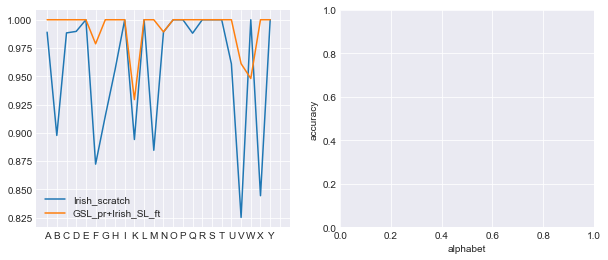

In [64]:
all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, [ax1,ax2] = plt.subplots(1,2)
figure.set_size_inches(10, 4)

ax1.plot([i for i in range(24)], Irish_scratch_var, label="Irish_scratch")
ax1.plot([i for i in range(24)], Irish_GSL_pre_var, label="GSL_pr+Irish_SL_ft")

ax1.set_xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax1.set_xticklabels( all_Alphabet_list )
ax1.legend(loc=3)

## Compare ASL and ASL+GSL_pretrain

In [46]:
#Confusion matrix for 1 unweighted 
ASL_scratch_var = np.genfromtxt("con_mat/con_mat_ASL_MNIST_imbal_novar_.csv", delimiter=',')
ASL_GSL_pre_var = np.genfromtxt("con_mat/con_mat_ASL_MNIST_imbal_yesvar_.csv", delimiter=',')
sum(ASL_scratch_var.diagonal())/sum(sum(ASL_scratch_var))
print("Accuracy for training from scratcch is :", sum(ASL_scratch_var.diagonal())/sum(sum(ASL_scratch_var)))
,
sum(ASL_GSL_pre_var.diagonal())/sum(sum(ASL_GSL_pre_var))
print("Accuracy for using pretrained model is :", sum(ASL_GSL_pre_var.diagonal())/sum(sum(ASL_GSL_pre_var)))

ASL_scratch_var =ASL_scratch_var.diagonal()/ASL_scratch_var.sum(axis=1)
ASL_GSL_pre_var =ASL_GSL_pre_var.diagonal()/ASL_GSL_pre_var.sum(axis=1)
print(len(ASL_GSL_pre_var))

Accuracy for training from scratcch is : 0.92
Accuracy for using pretrained model is : 0.9494
24


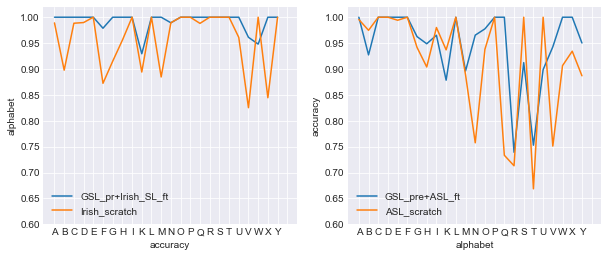

In [78]:
all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

figure, [ax1,ax2] = plt.subplots(1,2)
figure.set_size_inches(10, 4)

ax1.plot([i for i in range(24)], Irish_GSL_pre_var, label="GSL_pr+Irish_SL_ft")
ax1.plot([i for i in range(24)], Irish_scratch_var, label="Irish_scratch")

ax1.set_xticks([i for i in range(26)])
ax1.set_ylim([0.6, 1.02])
ax1.set_xlabel("accuracy")
ax1.set_ylabel("alphabet")
ax1.set_xticklabels( all_Alphabet_list )
ax1.legend(loc=3)



ax2.plot([i for i in range(24)], ASL_GSL_pre_var, label="GSL_pre+ASL_ft")
ax2.plot([i for i in range(24)], ASL_scratch_var, label="ASL_scratch")
ax2.set_xticks([i for i in range(26)])
plt.ylabel("accuracy")
plt.xlabel("alphabet")
ax2.set_xticklabels( all_Alphabet_list )
ax2.set_ylim([0.6, 1.02])
ax2.legend(loc=3)

### ASL

In [692]:
def make_plot(SL, unif, bald, maxX, mean,var, query, training_data,full_performance):
    unif_mean = np.mean(unif,axis=0 )
    unif_std = [np.std(unif[:,i]) for i in range(unif.shape[1])]
    unif_ci = [1.96 * i/np.sqrt(unif.shape[0]) for i in unif_std]
    
    var_std = [np.std(var[:,i]) for i in range(var.shape[1])]
    unif_ci = [1.96 * i/np.sqrt(var.shape[0]) for i in var_std]

    bald_mean = np.mean(bald,axis=0 )
    max_mean = np.mean(maxX,axis=0 )
    mean_mean = np.mean(mean,axis=0 )
    var_mean = np.mean(var,axis=0 )

    init_x= range(len(unif_mean))
    x = [(i*query + 50)/training_data*100 for i in init_x]
    
    fig = plt.figure()
    fig.set_size_inches(4, 4)
    plt.axhline(y = full_performance, color = 'r', linestyle = '--',label="Full dataset", linewidth=2)
    
    #plt.plot(x,bald_mean, label="BALD")
    #plt.plot(x,max_mean, label="Max Entropy")
    #plt.plot(x,mean_mean, label="Max mean std")
    plt.plot(x,var_mean, label="Max Variation Ratios",color='b', linewidth=3)
    plt.plot(x,unif_mean, label="Random",color="#FFA233", linewidth=3)
    
    plt.fill_between(x, (unif_mean-unif_ci), (unif_mean+unif_ci), color='#FFA233', alpha=.1)
    plt.fill_between(x, (var_mean-unif_ci), (var_mean+unif_ci), color='b', alpha=.1, linewidth=3)

    plt.legend(fontsize=50,loc=4)
    plt.xlabel("fraction of full training data(%)",fontsize=18)
    plt.ylabel("test accuracy",fontsize=18)
    #plt.title(SL+" active learning result")
    
    fig.savefig('result_img/new_images/AL_'+SL+'.png', dpi=300, bbox_inches = "tight")

### ASL

(3, 121)


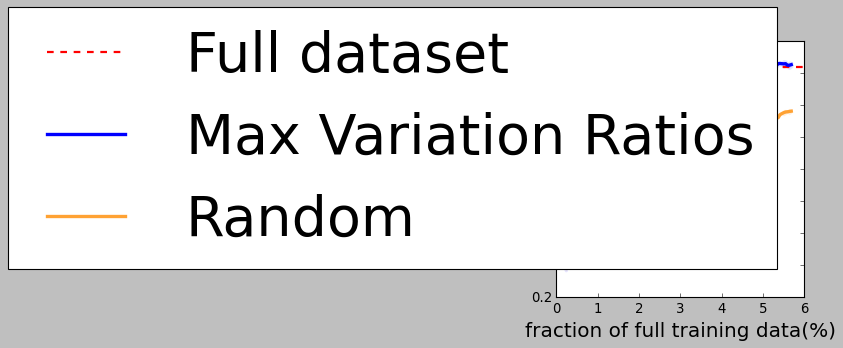

In [693]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
ASL_unif = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalunifcnnpre_trainFalse.npy")
print(ASL_unif.shape)
ASL_bald = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalbaldcnnpre_trainFalse.npy")
ASL_max = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalmax_cnnpre_trainFalse.npy")
ASL_mean = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalmeancnnpre_trainFalse.npy")
ASL_var = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_cnnpre_trainFalse.npy")
plt.style.use('classic')
#plt.style.use("seaborn-darkgrid")
make_plot(SL="ASL",unif=ASL_unif, bald=ASL_bald, maxX=ASL_max, mean=ASL_mean, var=ASL_var, query=10, training_data=22000,full_performance=0.92 )

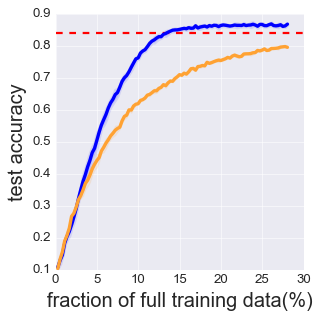

In [580]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
GSL_unif = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalunifcnnpre_trainFalse.npy")

GSL_bald = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalbaldcnnpre_trainFalse.npy")
GSL_max = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalmax_cnnpre_trainFalse.npy")
GSL_mean = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalmeancnnpre_trainFalse.npy")
GSL_var = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalvar_cnnpre_trainFalse.npy")

make_plot(SL="GSL",unif=GSL_unif, bald=GSL_bald, maxX=GSL_max, mean=GSL_mean,var=GSL_var, query=50, training_data=18000,full_performance=0.84 )

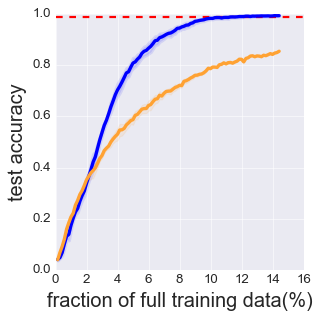

In [581]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
Irish_SL_unif = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalunifcnnpre_trainFalse.npy")

Irish_SL_bald = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalbaldcnnpre_trainFalse.npy")
Irish_SL_max = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalmax_cnnpre_trainFalse.npy")
Irish_SL_mean = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalmeancnnpre_trainFalse.npy")
Irish_SL_var = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_cnnpre_trainFalse.npy")

make_plot(SL="Irish_SL",unif=Irish_SL_unif, bald=Irish_SL_bald, maxX=Irish_SL_max, mean=Irish_SL_mean,var=Irish_SL_var, query=50, training_data=35000,full_performance=0.99 )

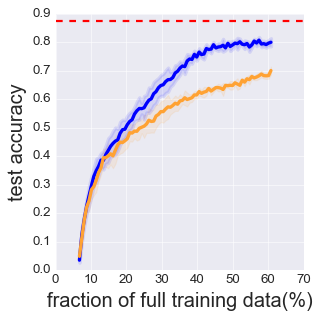

In [582]:
## First active learning result, query =10
#CSL: QUERY=5
#gsl,Irish_SL:query=50
Chinese_SL_unif = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalunifcnnpre_trainFalse.npy")
Chinese_SL_bald = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalbaldcnnpre_trainFalse.npy")
Chinese_SL_max = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalmax_cnnpre_trainFalse.npy")
Chinese_SL_mean = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalmeancnnpre_trainFalse.npy")
Chinese_SL_var = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalvar_cnnpre_trainFalse.npy")

make_plot(SL="Chinese_SL",unif=Chinese_SL_unif, bald=Chinese_SL_bald, maxX=Chinese_SL_max, mean=Chinese_SL_mean,var=Chinese_SL_var, query=5, training_data=740,full_performance=0.875 )

## Transfer Active learning result

In [3]:
def make_transfer_plot(SL, scratch, pre_1, pre_2, pre_3, pre_4, query,name, training_data, full_performance, plot=True):
    scratch_mean = np.mean(scratch,axis=0 )
    scratch_std = [np.std(scratch[:,i]) for i in range(scratch.shape[1])]
    scratch_ci = [1.96 * i/np.sqrt(scratch.shape[0]) for i in scratch_std]
    
    pre_1_std = [np.std(pre_1[:,i]) for i in range(pre_1.shape[1])]
    pre_1_ci = [1.96 * i/np.sqrt(pre_1.shape[0]) for i in pre_1_std]
    pre_1_mean = np.mean(pre_1,axis=0 )
    
    pre_2_mean = np.mean(pre_2,axis=0 )
    pre_3_mean = np.mean(pre_3,axis=0 )
    pre_4_mean = np.mean(pre_4,axis=0)
    print(pre_4_mean.shape)
    print("scratch_mean.shape :",scratch_mean.shape)

    init_x= range(len(scratch_mean))
    x = [(i*query + 50)/training_data*100 for i in init_x]
    print("percentage for iter =40: ", x[40])
    
    if plot == True:
        fig = plt.figure()
        fig.set_size_inches(6, 4)
        plt.axhline(y = full_performance, color = 'r', linestyle = '--',label="Full dataset")

        plt.plot(x,pre_1_mean, label=name[0])
        plt.plot(x,pre_2_mean, label=name[1])
        plt.plot(x,pre_3_mean, label=name[2],color="c")
        plt.plot(x,pre_4_mean, label=name[3],color="r")
        plt.plot(x,scratch_mean,label="No Pre-train",color='m' )
        
        

        plt.fill_between(x, (scratch_mean - scratch_ci), (scratch_mean + scratch_ci), color='m', alpha=.1)
        plt.fill_between(x, (pre_1_mean - pre_1_ci), (pre_1_mean+pre_1_ci), color='b', alpha=.1)

        plt.legend(fontsize=13.5,loc=4)
        plt.xlabel("fraction of full training set (%)",fontsize=18)
        plt.ylabel("test accuracy",fontsize=18)
        plt.ylim([0.01,1.02])
        #plt.title(SL+" transfer active learning result")
    
    #fig.savefig('result_img/new_images/AL_'+SL+'.png', dpi=100)
    result= {"scratch_mean":scratch_mean, "pre_1_mean": pre_1_mean, "pre_2_mean": pre_2_mean ,
             "pre_3_mean": pre_3_mean , "scratch_ci": scratch_ci, "pre_1_ci": pre_1_ci }
    return result

(5, 101)
(101,)
scratch_mean.shape : (101,)
percentage for iter =40:  2.0454545454545454


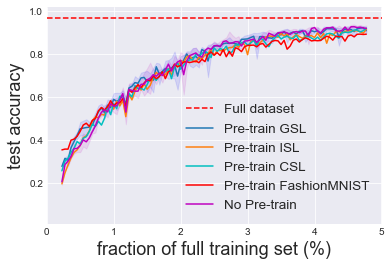

In [14]:
ASL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_pre_trainFalse_res18.npy")
#ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_pre_trainGSL_MNIST_imbal_res18.npy")
ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal_2.npy")
ASL_pre_GSL=ASL_pre_GSL[:,:101]
print(ASL_pre_GSL.shape)
ASL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
ASL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
ASL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result/ASL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")
ASL_pre_Chinese=ASL_pre_Chinese[:,:101]

plt.style.use("seaborn-darkgrid")
#plt.style.use('classic')
name = ["Pre-train GSL", "Pre-train ISL","Pre-train CSL","Pre-train FashionMNIST" ]
result_ASL = make_transfer_plot(SL="ASL",scratch=ASL_scratch, pre_1=ASL_pre_GSL, pre_2=ASL_pre_Irish, pre_3=ASL_pre_Chinese,
                                pre_4 =ASL_pre_Fashion, name=name, query=10, training_data=22000, full_performance=0.97, plot=True )

(60,)
scratch_mean.shape : (60,)
percentage for iter =40:  5.857142857142858


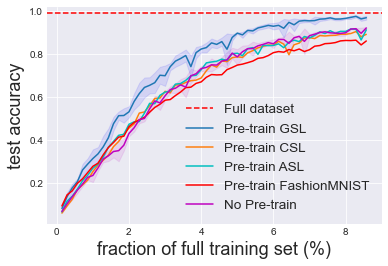

In [12]:
Irish_SL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")[:,:60]
Irish_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_pre_trainGSL_MNIST_imbal.npy")[:,:60]
Irish_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")[:,:60]
Irish_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")[:,:60]
Irish_SL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")[:,:60]

for i in [Irish_SL_scratch, Irish_SL_pre_GSL,Irish_SL_pre_ASL,Irish_SL_pre_Fashion,Irish_SL_pre_Chinese ]:
    i = i[:,:80]

name = ["Pre-train GSL", "Pre-train CSL", "Pre-train ASL", "Pre-train FashionMNIST" ]
result_Irish_SL = make_transfer_plot(SL="Irish_SL",scratch=Irish_SL_scratch, pre_1=Irish_SL_pre_GSL, pre_2=Irish_SL_pre_Chinese, pre_3=Irish_SL_pre_ASL,
                                     pre_4 = Irish_SL_pre_Fashion, name=name, query=50, training_data=35000, full_performance=0.99, plot=True )

(80,)
scratch_mean.shape : (80,)
percentage for iter =40:  11.38888888888889


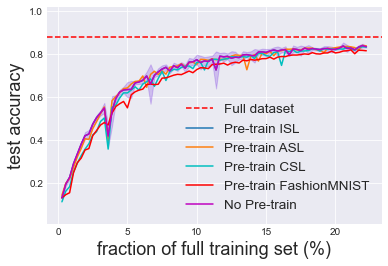

In [13]:
GSL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result/Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")[:,:80]
GSL_pre_Irish_SL = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")[:,:80]
GSL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")[:,:80]
GSL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")[:,:80]
GSL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/np_result/GSL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")[:,:80]



name = ["Pre-train ISL", "Pre-train ASL","Pre-train CSL","Pre-train FashionMNIST" ]
result_GSL = make_transfer_plot(SL="GSL",scratch=GSL_pre_Irish_SL, pre_1=GSL_pre_Irish_SL, pre_2=GSL_pre_ASL, pre_3=GSL_pre_Chinese,
                                pre_4=GSL_pre_Fashion, name=name, query=50, training_data=18000,full_performance=0.88  )

(71,)
scratch_mean.shape : (71,)
percentage for iter =40:  33.78378378378378


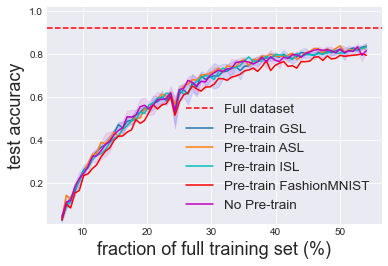

In [10]:
Chinese_SL_scratch = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalvar_res18pre_trainFalse.npy")

Chinese_SL_pre_Irish_SL = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
Chinese_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
Chinese_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
Chinese_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/np_result/Chinese_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")


name = ["Pre-train GSL","Pre-train ASL","Pre-train ISL", "Pre-train FashionMNIST"]
result_CSL = make_transfer_plot(SL="chinese_SL",scratch=Chinese_SL_scratch, pre_1=Chinese_SL_pre_GSL, pre_2=Chinese_SL_pre_ASL, pre_3=Chinese_SL_pre_Irish_SL,
                                pre_4 =Chinese_SL_pre_Fashion, name=name, query=5, training_data=740,full_performance=0.92 )

#### visualize their cnfusion matrix

In [740]:
def make_con_mat_plot(SL, scratch, pre_1, pre_2, pre_3, pre_4, iterr_num ,name):
    """Make plots for viaualizing confusion matrix"""
    
    all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]

    con_scratch =np.array([scratch[i,iterr_num].diagonal()/scratch[i,iterr_num].sum(axis=1) for i in range(scratch.shape[0])])
    con_scratch_mean = con_scratch.mean(axis=0)
    print(con_scratch_mean.shape)
    con_scratch_std = con_scratch.std(axis=0)
    con_scratch_ci = [1.96 * i/np.sqrt(scratch.shape[0]) for i in con_scratch_std]
    
    con_pre_1 =np.array([pre_1[i,iterr_num].diagonal()/pre_1[i,iterr_num].sum(axis=1) for i in range(pre_1.shape[0])])
    con_pre_1_mean = con_pre_1.mean(axis=0)
    con_pre_1_std = con_pre_1.std(axis=0)
    con_pre_1_ci = [1.96 * i/np.sqrt(pre_1.shape[0]) for i in con_pre_1_std]
    
    whole_scratch_mean = np.mean([sum(scratch[i,iterr_num].diagonal())/sum(sum(scratch[i,iterr_num])) for i in range(scratch.shape[0])])
    print("Accuracy for training from scratcch is :", whole_scratch_mean)
    whole_pre_1_mean = np.mean([sum(pre_1[i,iterr_num].diagonal())/sum(sum(pre_1[i,iterr_num])) for i in range(pre_1.shape[0])])
    print("Accuracy for training from "+name[0]+" is :", whole_pre_1_mean)
    
    
    con_pre_2 =np.array([pre_2[i,iterr_num].diagonal()/pre_2[i,iterr_num].sum(axis=1) for i in range(pre_2.shape[0])])
    con_pre_2_mean = con_pre_2.mean(axis=0)
    
    con_pre_3 =np.array([pre_3[i,iterr_num].diagonal()/pre_3[i,iterr_num].sum(axis=1) for i in range(pre_3.shape[0])])
    con_pre_3_mean = con_pre_3.mean(axis=0)
    
    con_pre_4 =np.array([pre_4[i,iterr_num].diagonal()/pre_4[i,iterr_num].sum(axis=1) for i in range(pre_4.shape[0])])
    con_pre_4_mean = con_pre_4.mean(axis=0)
    
    
    init_x= range(len(con_scratch_mean))
    

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 1.2)
    
    x = [i for i in range(24)]
    if  SL == "Irish_SL":
        plt.plot(x, con_pre_1_mean, label=name[0])
    else: 
        plt.plot(x, con_pre_1_mean, label=name[0],color='m')
    plt.plot(x, con_scratch_mean, label="No Pre-training",color="g")
    #plt.plot(x, con_pre_2_mean, label=name[1])
    #plt.plot(x, con_pre_3_mean, label=name[2])
    #plt.plot(x, con_pre_4_mean, label=name[3])

    
    plt.fill_between(x, (con_scratch_mean - con_scratch_ci), (con_scratch_mean + con_scratch_ci), color='g', alpha=.1)
    plt.fill_between(x, (con_pre_1_mean - con_pre_1_ci), (con_pre_1_mean+ con_pre_1_ci), color='b', alpha=.1)

    ax.set_xticks([i for i in range(24)])
    ax.set_xlabel("alphabet")
    ax.set_ylabel("accuracy")
    ax.set_xticklabels( all_Alphabet_list )
    plt.ylim([0.26,1.02])
    if SL == "Irish_SL":
        plt.gca().get_xticklabels()[6].set_color("red")
        plt.gca().get_xticklabels()[7].set_color("red")
        plt.gca().get_xticklabels()[9].set_color("red")
        plt.gca().get_xticklabels()[10].set_color("red")
        plt.gca().get_xticklabels()[14].set_color("red")
        plt.gca().get_xticklabels()[15].set_color("red")
        plt.gca().get_xticklabels()[18].set_color("red")
        plt.gca().get_xticklabels()[22].set_color("red")
    if SL =="ASL" and name[0]=="Pre-training CSL":
        plt.gca().get_xticklabels()[3].set_color("red")
        plt.gca().get_xticklabels()[4].set_color("red")
        plt.gca().get_xticklabels()[5].set_color("red")
        plt.gca().get_xticklabels()[7].set_color("red")
        plt.gca().get_xticklabels()[8].set_color("red")
        plt.gca().get_xticklabels()[9].set_color("red")
        plt.gca().get_xticklabels()[14].set_color("red")
        plt.gca().get_xticklabels()[15].set_color("red")
        plt.gca().get_xticklabels()[16].set_color("red")
        plt.gca().get_xticklabels()[17].set_color("red")
        plt.gca().get_xticklabels()[18].set_color("red")
        plt.gca().get_xticklabels()[19].set_color("red")
        plt.gca().get_xticklabels()[23].set_color("red")
    #if SL=="ASL" and name[0]=="Pretrain_GSL":
        
        
        
    #plt.legend(fontsize=80,loc=4)
    leg = plt.legend(fontsize=80,loc=4)
    leg.get_lines()[0].set_linewidth(6)
    leg.get_lines()[1].set_linewidth(6)
    #plt.title(SL+" transfer active learning result")
    
    #fig.savefig('result_img/new_images/AL_'+SL+'.png', dpi=100)

(24,)
Accuracy for training from scratcch is : 0.7549599999999999
Accuracy for training from Pre-training CSL is : 0.7674399999999999


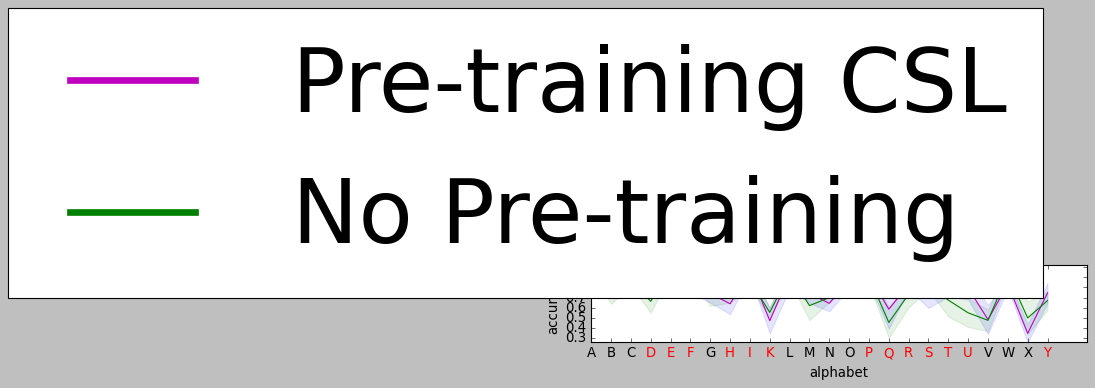

In [742]:
con_ASL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_ASL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_ASL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_ASL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
con_ASL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_ASL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_ASL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_ASL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_ASL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_ASL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


plt.style.use('classic')
#plt.style.use("seaborn-darkgrid")
name = ["Pre-training CSL" , "Pretrain_GSL" ,"pretrain_Irish_SL","pretrain_Fashion"]
make_con_mat_plot(SL="ASL",scratch=con_ASL_scratch, pre_1=con_ASL_pre_Chinese, pre_2=con_ASL_pre_Irish, pre_3=con_ASL_pre_Fashion,
                  pre_4 =con_ASL_pre_Chinese, name=name,iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.7549599999999999
Accuracy for training from Pre-training GSL is : 0.8038400000000001


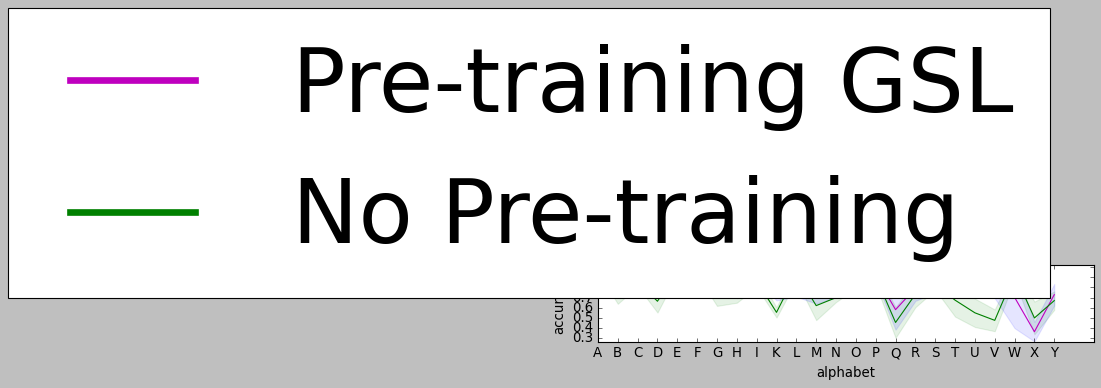

In [743]:
name = ["Pre-training GSL" , "Pretrain_Chinese_SL" ,"pretrain_Irish_SL","pretrain_Fashion"]
make_con_mat_plot(SL="ASL",scratch=con_ASL_scratch, pre_1=con_ASL_pre_GSL, pre_2=con_ASL_pre_Irish, pre_3=con_ASL_pre_Fashion,
                  pre_4 =con_ASL_pre_Chinese, name=name,iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.804889298892989
Accuracy for training from Pre-training GSL is : 0.8967712177121772


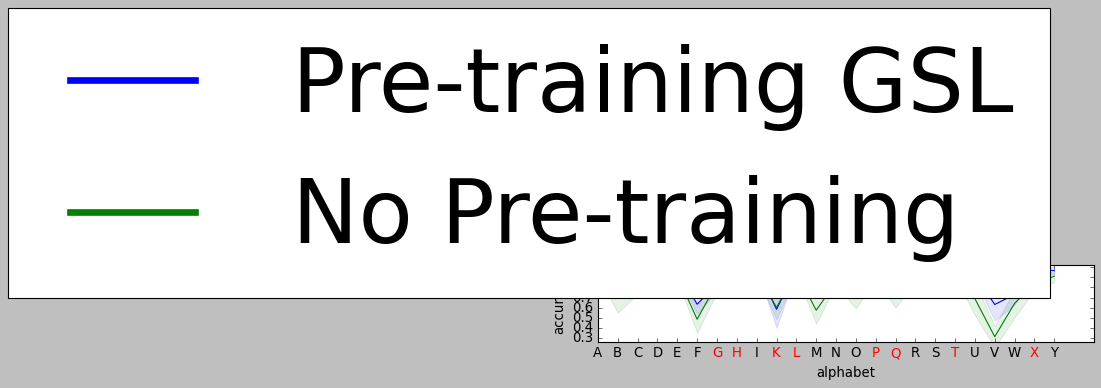

In [744]:
con_Irish_SL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_Irish_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_Irish_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_Irish_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_Irish_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Irish_SL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


name = ["Pre-training GSL" ,"pretrain_Irish_SL","pretrain_Fashion", "pretrain_Chinese_SL" ]
make_con_mat_plot(SL="Irish_SL",scratch=con_Irish_SL_scratch, pre_1=con_Irish_SL_pre_GSL, pre_2=con_ASL_pre_Irish, pre_3=con_ASL_pre_Fashion,
                  pre_4 = con_Irish_pre_Chinese, name=name,iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.7625456442357852
Accuracy for training from pretrain_ISL is : 0.780699008868023


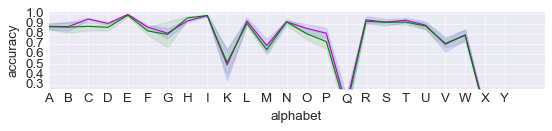

In [723]:
con_GSL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_GSL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_GSL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_GSL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")
con_GSL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_GSL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_GSL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_GSL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_GSL_pre_Chinese = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_GSL_MNIST_imbalvar_res18pre_trainChinese_SL_MNIST_imbal.npy")


name = ["pretrain_ISL", "Pretrain_ASL" , "pretrain_Fashion", "pretrain_Chinese_SL" ]
make_con_mat_plot(SL="GSL",scratch=con_GSL_scratch, pre_1=con_GSL_pre_Irish, pre_2=con_GSL_pre_ASL, pre_3=con_GSL_pre_Fashion,
                  pre_4= con_GSL_pre_Chinese, name=name, iterr_num=40)

(24,)
Accuracy for training from scratcch is : 0.7641975308641976
Accuracy for training from pretrain_ASL is : 0.7672839506172839


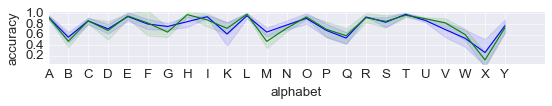

In [448]:
con_Chinese_SL_scratch = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainFalse.npy")
con_Chinese_SL_pre_ASL = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainASL_MNIST_imbal.npy")
con_Chinese_SL_pre_GSL = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainGSL_MNIST_imbal.npy")
con_Chinese_SL_pre_Fashion = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainFashion_MNIST.npy")
con_Chinese_SL_pre_Irish = np.load("D:/AI_thesis/workshop_paper/con_mat/con_mat_Chinese_SL_MNIST_imbalvar_res18pre_trainIrish_SL_MNIST_imbal.npy")

name = ["pretrain_ASL" ,"pretrain_GSL","pretrain_Fashion","pretrain_Irish_SL" ]
make_con_mat_plot(SL="Chinese_SL",scratch=con_Chinese_SL_scratch, pre_1=con_Chinese_SL_pre_ASL, pre_2=con_Chinese_SL_pre_GSL, pre_3=con_Chinese_SL_pre_Fashion,
                  pre_4=con_Chinese_SL_pre_Irish, name=name,iterr_num=40)

## The combined plot for paper

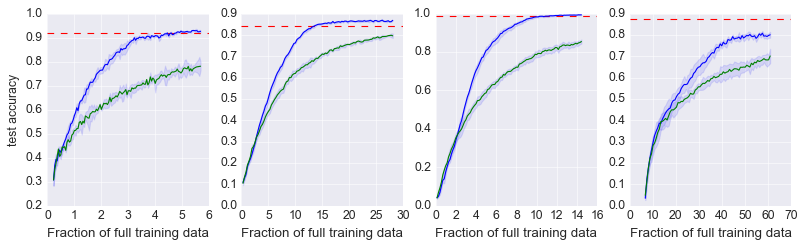

In [173]:
plt.style.use("seaborn-darkgrid")

names =  locals()
data_list=["ASL_", "GSL_", "Irish_SL_", "Chinese_SL_"]
query_dict={"ASL_":10, "GSL_":50, "Irish_SL_":50, "Chinese_SL_":5}
data_am_dict = {"ASL_":22000, "GSL_":18000, "Irish_SL_":35000, "Chinese_SL_":740} 
full_performance_list = {"ASL_":0.92 , "GSL_": 0.84, "Irish_SL_": 0.99, "Chinese_SL_": 0.875}

fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(12, 3)
ax1.set_ylabel('test accuracy', Fontsize=11)
for num, i in enumerate(data_list):
    sign_corp = data_list[num]
    unif = names[sign_corp+"unif"]
    names[sign_corp+"unif_mean"]  = np.mean(unif,axis=0 )
    names[sign_corp+"unif_std"] = [np.std(unif[:,i]) for i in range(unif.shape[1])]
    names[sign_corp+"unif_ci"] = [1.96 * i/np.sqrt(unif.shape[0]) for i in names[sign_corp+"unif_std"] ]
    
    var = names[sign_corp+"var"]
    names[sign_corp+"var_mean"]  = np.mean(var,axis=0 )
    names[sign_corp+"var_std"] = [np.std(var[:,i]) for i in range(var.shape[1])]
    names[sign_corp+"var_ci"] = [1.96 * i/np.sqrt(var.shape[0]) for i in names[sign_corp+"var_std"] ]
    
    init_x = range(len(names[sign_corp+"unif_mean"]))
    x = [(i*query_dict[sign_corp] + 50)/data_am_dict[sign_corp]*100 for i in init_x]
    ax = names["ax"+str(num+1)]
    
    ax.axhline(y = full_performance_list[sign_corp], color = 'r', linestyle = '--',label="full dataset performance")
    ax.plot(x,names[sign_corp+"var_mean"], label=sign_corp + "Max Variation Ratios")
    ax.fill_between(x, (names[sign_corp+"var_mean"]-names[sign_corp+"var_ci"]), (names[sign_corp+"var_mean"]+names[sign_corp+"var_ci"]), color='b', alpha=.1)
    
    ax.plot(x, names[sign_corp+"unif_mean"], label=sign_corp + "Random (baseline)")
    ax.fill_between(x, (names[sign_corp+"unif_mean"]-names[sign_corp+"unif_ci"]), (names[sign_corp+"unif_mean"]+names[sign_corp+"unif_ci"]), color='b', alpha=.1)
    
    #plt.ylabel("test accuracy")
    ax.set_xlabel("Fraction of full training data", Fontsize=12)
    ax.tick_params(axis='x', labelsize=11 )
    ax.tick_params(axis='y', labelsize=11 )
    #names["ax"+str(num+1)].legend()



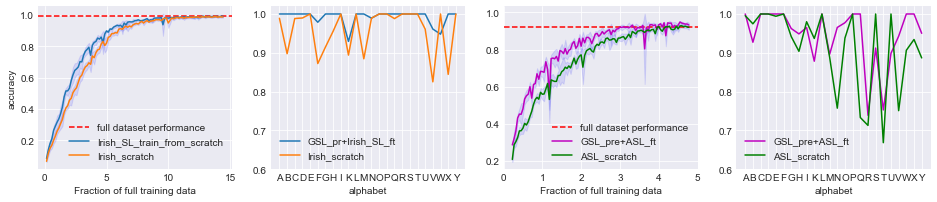

In [129]:
## PLot GSL effect on Irish_SL
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(16, 3)

Irish_SL_pre_GSL_mean = np.mean(Irish_SL_pre_GSL,axis=0)
Irish_SL_pre_GSL_std = [np.std(Irish_SL_pre_GSL[:,i]) for i in range(Irish_SL_pre_GSL.shape[1])]

x= range(len(Irish_SL_pre_GSL_mean))
x = [(i*50 + 50)/35000*100 for i in x]
pre_ci = [1.96 * i/np.sqrt(Irish_SL_pre_GSL.shape[0]) for i in Irish_SL_pre_GSL_std]
ax1.axhline(y = 0.99, color = 'r', linestyle = '--',label="full dataset performance")
ax1.plot(x,Irish_SL_pre_GSL_mean, label="Irish_SL_train_from_scratch")
ax1.fill_between(x, (Irish_SL_pre_GSL_mean-pre_ci), (Irish_SL_pre_GSL_mean+pre_ci), color='b', alpha=.1)

scratch_ci = [1.96 * i/np.sqrt(Irish_SL_scratch.shape[0]) for i in Irish_SL_scratch_std]
ax1.plot(x,Irish_SL_scratch_mean, label="Irish_scratch")
ax1.set_ylabel("accuracy")
ax1.fill_between(x, (Irish_SL_scratch_mean-scratch_ci), (Irish_SL_scratch_mean+scratch_ci), color='b', alpha=.1)
ax1.set_xlabel("Fraction of full training data")
ax1.legend()

## PLot GSL effect on A_SL
ax3.axhline(y = 0.92, color = 'r', linestyle = '--',label="full dataset performance")
x= range(len(ASL_scratch_mean))
x = [(i*10 + 50)/22000*100 for i in x]

xx = [str(i)+"%" for i in x]
#print(xx)
#ax2.set_xticklabels(xx)

pre_ci = [1.96 * i/np.sqrt(ASL_pre_GSL.shape[0]) for i in ASL_pre_GSL_std]
ax3.plot(x,ASL_pre_GSL_mean, label="GSL_pre+ASL_ft",color='m')
ax3.fill_between(x, (ASL_pre_GSL_mean-pre_ci), (ASL_pre_GSL_mean+pre_ci), color='b', alpha=.1)

scratch_ci = [1.96 * i/np.sqrt(ASL_scratch.shape[0]) for i in ASL_scratch_std]
ax3.plot(x,ASL_scratch_mean, label="ASL_scratch",color='g')
ax3.fill_between(x, (ASL_scratch_mean-scratch_ci), (ASL_scratch_mean+scratch_ci), color='b', alpha=.1)
ax3.set_xlabel("Fraction of full training data")
ax3.legend()


all_Alphabet_list=["A","B","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]


ax2.plot([i for i in range(24)], Irish_GSL_pre_var, label="GSL_pr+Irish_SL_ft")
ax2.plot([i for i in range(24)], Irish_scratch_var, label="Irish_scratch")

ax2.set_xticks([i for i in range(24)])
ax2.set_ylim([0.6, 1.02])
ax2.set_xlabel("alphabet")
ax2.set_xticklabels( all_Alphabet_list )
ax2.legend(loc=3)



ax4.plot([i for i in range(24)], ASL_GSL_pre_var, label="GSL_pre+ASL_ft", color='m')
ax4.plot([i for i in range(24)], ASL_scratch_var, label="ASL_scratch", color='g')
ax4.set_xticks([i for i in range(24)])
plt.xlabel("alphabet")
ax4.set_xticklabels( all_Alphabet_list )
ax4.set_ylim([0.6, 1.02])
ax4.legend(loc=3)